# **Ad Click Prediction Project**
## A Data Science Solution for Digital Marketing Optimization

# Project Setup and Data Loading


In this section, we import necessary libraries and load our dataset.
Key libraries include:

*   pandas: for data manipulation
*   numpy: for numerical operations
*   matplotlib & seaborn: for visualization
*   scikit-learn: for machine learning models



In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine Learning - Model Selection
from sklearn.model_selection import train_test_split


# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing evaluation metrics for model assessment
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Load training data
df = pd.read_csv('/content/drive/MyDrive/Challenge_Marketing/Train.csv')
df


,impressions,clicks,cost,conversions,ad_type,currency,ID,date,call_type,call_status,start_time,duration,end_time,display_location,impression_share,conversions_calls,headline1_len,headline2_len,ad_description_len
0,142.00,15.00,3393.00,0.00,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.28,0.00,2.00,5.00,11.00
1,89.00,8.00,1817.00,0.00,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.28,0.00,2.00,2.00,13.00
2,59.00,8.00,1743.00,0.00,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.28,0.00,2.00,2.00,10.00
3,78.00,4.00,917.00,0.00,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.28,0.00,2.00,3.00,13.00
4,20.00,1.00,217.00,0.00,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.28,0.00,2.00,2.00,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289921,NaN,NaN,NaN,NaN,NaN,NaN,ID_65687e2b40ea026fcc662a75,2024-02-03,NaN,NaN,NaN,NaN,NaN,NaN,12.04,0.00,NaN,NaN,NaN
289922,NaN,NaN,NaN,NaN,NaN,NaN,ID_65687e2b40ea026fcc662a75,2024-02-04,NaN,NaN,NaN,NaN,NaN,NaN,15.71,0.00,NaN,NaN,NaN
289923,NaN,NaN,NaN,NaN,NaN,NaN,ID_65a7bf329fa4627faf28390c,2024-02-03,NaN,NaN,NaN,NaN,NaN,NaN,15.46,0.00,NaN,NaN,NaN
289924,NaN,NaN,NaN,NaN,NaN,NaN,ID_65b0f65c7fe62e56c5593d55,2024-02-03,NaN,NaN,NaN,NaN,NaN,NaN,10.02,0.00,NaN,NaN,NaN


## **Data Preprocessing**


Data Preprocessing

Initial data cleaning and handling of missing values based on their percentage and importance.

This ensures data quality while preserving as much information as possible.

In [ ]:
# Check missing values percentage across columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

print(missing_value_df)

                           column_name  percent_missing
impressions                impressions             0.14
clicks                          clicks             0.14
cost                              cost             0.14
conversions                conversions             0.14
ad_type                        ad_type             0.14
currency                      currency             0.14
ID                                  ID             0.00
date                              date             0.00
call_type                    call_type            87.27
call_status                call_status            87.27
start_time                  start_time            87.27
duration                      duration            87.27
end_time                      end_time            87.27
display_location      display_location            87.27
impression_share      impression_share             0.00
conversions_calls    conversions_calls             3.40
headline1_len            headline1_len          


Missing Value Treatment Strategy

Analysis of missing values led to a three-tier handling approach:

1. Low missing rates (0.14%): Basic imputation
  - Numerical columns (median): impressions, clicks, cost, conversions, headline lengths
  - Categorical columns (mode): display_location (retained despite 87.27% missing due to importance in ad placement strategy)

2. Moderate missing (3.40%): Imputation with flag
  - conversions_calls: Median imputation + missing indicator

3. High missing (87.27%): Removal
  - Dropped call-related features (call_type, status, times, duration)



In [ ]:

# Impute small missing percentages with median for numerical columns and mode for categorical columns
for column in ['impressions', 'clicks', 'cost', 'conversions', 'headline1_len', 'headline2_len', 'ad_description_len','display_location']:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# For moderate missing data, impute and create a missing indicator
df['conversions_calls_missing'] = df['conversions_calls'].isna()
df['conversions_calls'].fillna(df['conversions_calls'].median(), inplace=True)

# For high missing data, consider dropping the columns if not crucial
df.drop(['call_type', 'call_status', 'start_time', 'duration', 'end_time',], axis=1, inplace=True)

# Check the DataFrame after operations
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289926 entries, 0 to 289925
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   impressions                289926 non-null  float64
 1   clicks                     289926 non-null  float64
 2   cost                       289926 non-null  float64
 3   conversions                289926 non-null  float64
 4   ad_type                    289526 non-null  object 
 5   currency                   289526 non-null  object 
 6   ID                         289926 non-null  object 
 7   date                       289926 non-null  object 
 8   display_location           289926 non-null  object 
 9   impression_share           289926 non-null  float64
 10  conversions_calls          289926 non-null  float64
 11  headline1_len              289926 non-null  float64
 12  headline2_len              289926 non-null  float64
 13  ad_description_len         28

In [ ]:
# Check dataset dimensions (rows, columns)
df.shape

(289926, 15)

# Feature Engineering


Create time-based features and rolling averages to capture temporal patterns
in ad performance.

These features help predict future click rates.

## **Creating Time-Based Features**

In [ ]:
# First, ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])


# For forecasting clicks one and two weeks ahead: rolling average:
df['rolling_avg_clicks_7'] = df['clicks'].rolling(window=7).mean()  # 7-day rolling average of clicks
df['rolling_avg_clicks_14'] = df['clicks'].rolling(window=14).mean()  # 14-day rolling average of clicks

# Dropping rows where NaN values were created by shifts or rolling averages
df.dropna(subset=[ 'rolling_avg_clicks_7', 'rolling_avg_clicks_14'], inplace=True)

In [ ]:
# Verify data structure and remaining features after cleaning
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 289913 entries, 13 to 289925
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   impressions                289913 non-null  float64       
 1   clicks                     289913 non-null  float64       
 2   cost                       289913 non-null  float64       
 3   conversions                289913 non-null  float64       
 4   ad_type                    289513 non-null  object        
 5   currency                   289513 non-null  object        
 6   ID                         289913 non-null  object        
 7   date                       289913 non-null  datetime64[ns]
 8   display_location           289913 non-null  object        
 9   impression_share           289913 non-null  float64       
 10  conversions_calls          289913 non-null  float64       
 11  headline1_len              289913 non-null  float64     

Data Structure Analysis
---------------------
Current data types show need for encoding:
- Object (categorical) features: ad_type, currency, ID, display_location
- Already numeric: impressions, clicks, cost, etc.
- DateTime: date column needs feature extraction
- Boolean: conversions_calls_missing

Next step: Encode categorical variables for model compatibility

# Feature Encoding

Transform categorical variables into numerical format for model training.

Includes handling of categorical variables and ID encoding for tracking predictions.

In [ ]:
import pandas as pd
import json


# Make sure to fill any remaining NaN values with the most common category or other suitable value
df['ad_type'].fillna('Unknown', inplace=True)
df['currency'].fillna('Unknown', inplace=True)
df['display_location'].fillna(df['display_location'].mode()[0], inplace=True)

# One-Hot Encoding for nominal categorical features
df = pd.get_dummies(df, columns=['ad_type', 'currency', 'display_location'], drop_first=True)

# Create a mapping of original IDs to a simple index
df['ID_encoded'] = df.index

# Create a dictionary for ID mapping
id_mapping = dict(zip(df['ID_encoded'], df['ID']))

# Optionally, drop the original ID column if it's no longer needed
df.drop(['ID'], axis=1, inplace=True)

# Check DataFrame to verify the new encoding
print(df.info())

# Save the id_mapping for future use in submission
with open('id_mapping.json', 'w') as f:
    json.dump(id_mapping, f)

<class 'pandas.core.frame.DataFrame'>
Index: 289913 entries, 13 to 289925
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   impressions                    289913 non-null  float64       
 1   clicks                         289913 non-null  float64       
 2   cost                           289913 non-null  float64       
 3   conversions                    289913 non-null  float64       
 4   date                           289913 non-null  datetime64[ns]
 5   impression_share               289913 non-null  float64       
 6   conversions_calls              289913 non-null  float64       
 7   headline1_len                  289913 non-null  float64       
 8   headline2_len                  289913 non-null  float64       
 9   ad_description_len             289913 non-null  float64       
 10  conversions_calls_missing      289913 non-null  bool          
 11  roll

# Exploratory Data Analysis (EDA)

Analyze relationships between features and target variable through
correlation analysis and visualization.

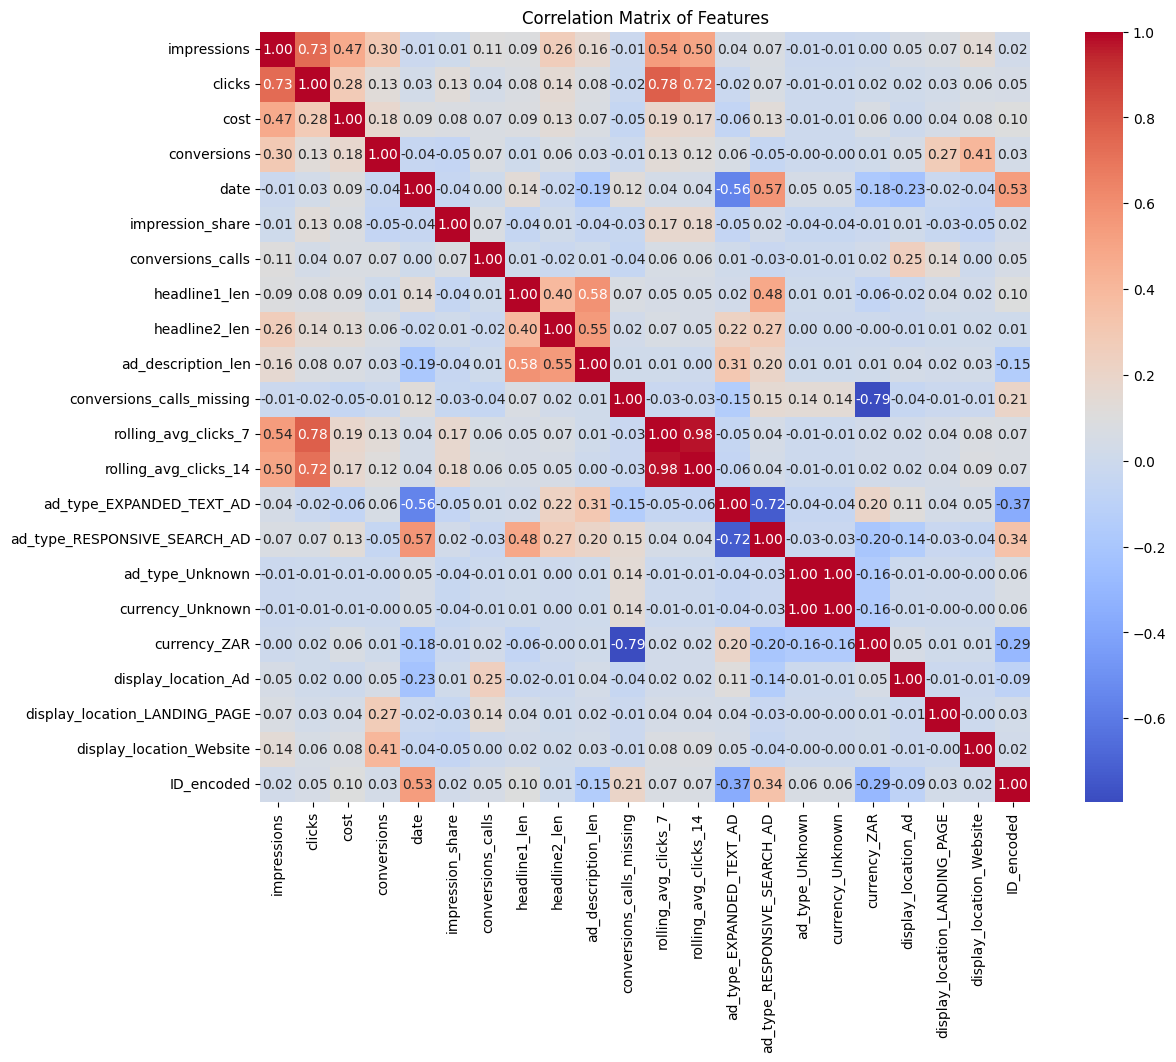

In [ ]:
# Calculate the correlation matrix for numerical features only
corr_matrix = df.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Check correlations of all features with 'clicks'
target_corr = corr_matrix['clicks'].sort_values(ascending=False)
print("Correlations of features with clicks:")
print(target_corr)

Correlations of features with clicks:
clicks                           1.00
rolling_avg_clicks_7             0.78
impressions                      0.73
rolling_avg_clicks_14            0.72
cost                             0.28
headline2_len                    0.14
conversions                      0.13
impression_share                 0.13
ad_description_len               0.08
headline1_len                    0.08
ad_type_RESPONSIVE_SEARCH_AD     0.07
display_location_Website         0.06
ID_encoded                       0.05
conversions_calls                0.04
display_location_LANDING_PAGE    0.03
date                             0.03
currency_ZAR                     0.02
display_location_Ad              0.02
ad_type_Unknown                 -0.01
currency_Unknown                -0.01
conversions_calls_missing       -0.02
ad_type_EXPANDED_TEXT_AD        -0.02
Name: clicks, dtype: float64


Correlation Analysis with Click Rate
----------------------------------
Key findings from correlation analysis:

Strong Correlations (> 0.7):
- rolling_avg_clicks_7 (0.78): Strongest predictor, showing weekly patterns matter
- impressions (0.73): Strong relationship between visibility and clicks
- rolling_avg_clicks_14 (0.72): Biweekly trends also highly relevant

Moderate Correlations (0.2 - 0.7):
- cost (0.28): Moderate positive correlation with ad spend

Weak Correlations (< 0.2):
- Content-related: headline lengths and ad descriptions show minimal impact
- Campaign settings: ad types and display locations have limited individual influence
- Currency and ID features show negligible correlations

Insights:
1. Historical performance (rolling averages) are best predictors
2. Ad visibility (impressions) strongly influences clicks
3. Content features surprisingly show weak correlations
4. Most categorical features have minimal individual impact

# **Model Preparation: Feature Selection and Data Split**

Features selected combining engineered and correlated predictors:

1. Engineered temporal features:
   - rolling_avg_clicks_7: 7-day rolling mean for trend capture
   - rolling_avg_clicks_14: 14-day rolling mean for longer patterns

2. Correlation-based features:
   - impressions: strong correlation (0.73)
   - cost, headline2_len, conversions: supporting metrics

This combination leverages both historical patterns and key performance indicators.

In [ ]:
from sklearn.model_selection import train_test_split

# feature selection and target variable
features = ['rolling_avg_clicks_7', 'rolling_avg_clicks_14', 'impressions', 'cost', 'headline2_len', 'conversions']
X = df[features]
y = df['clicks']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Selection and Evaluation**

Implementing multiple regression models to predict ad clicks.
Random Forest selected as primary model based on initial testing.
Other models (Linear, Ridge, Gradient Boosting) commented out after evaluation.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train each model and calculate RMSE
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    results[name] = rmse
    print(f'{name}: RMSE = {rmse}')

# Identify the best model based on RMSE
best_model_name = min(results, key=results.get)
print(f"\nBest Model: {best_model_name} with RMSE = {results[best_model_name]}")

Linear Regression: RMSE = 17.089534404340665
Ridge Regression: RMSE = 17.089534034106414
Random Forest: RMSE = 5.136060963788017
Gradient Boosting: RMSE = 6.3853888430100625

Best Model: Random Forest with RMSE = 5.136060963788017


# **Feature Importance Analysis**

Analyze which features contribute most to prediction accuracy

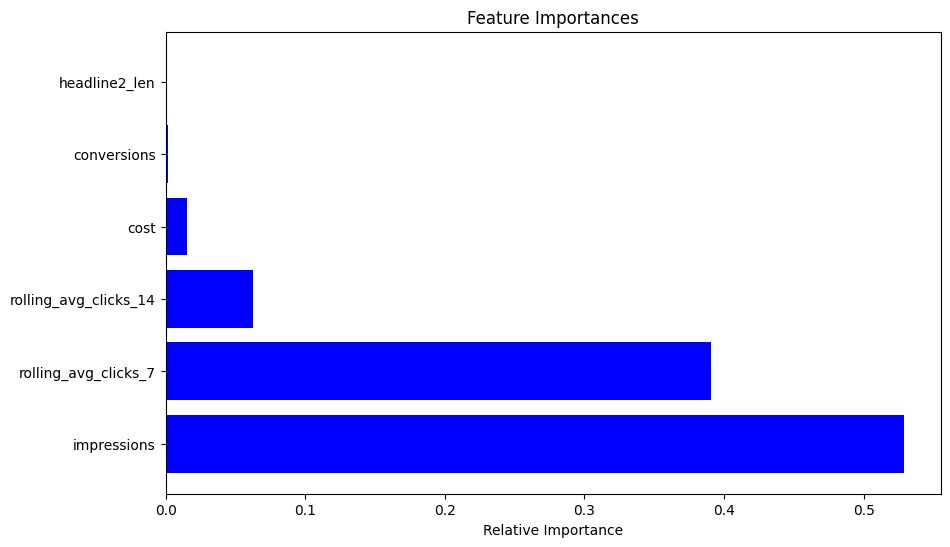

In [ ]:
# Get feature importances from the Random Forest model
feature_importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Key Insight: Ad visibility (impressions) and recent performance (7-day average) are the strongest predictors of future clicks, while content features (headline length) have minimal impact.

## **Final Predictions and Submission Preparation**

Generate predictions and prepare submission file with required format

In [ ]:
# Predict clicks on the test set
y_pred = model.predict(X_test)

# Display some predictions
for i, prediction in enumerate(y_pred[:10]):
    print(f"Test Sample {i+1}: Predicted Clicks = {prediction}")

Test Sample 1: Predicted Clicks = 8.01500289838677
Test Sample 2: Predicted Clicks = 6.863547884233414
Test Sample 3: Predicted Clicks = -0.025256924760446137
Test Sample 4: Predicted Clicks = 2.949438954737957
Test Sample 5: Predicted Clicks = 0.5370536003657201
Test Sample 6: Predicted Clicks = 97.51073015575643
Test Sample 7: Predicted Clicks = 1.3600312888386141
Test Sample 8: Predicted Clicks = -0.0402778936215495
Test Sample 9: Predicted Clicks = 3.5025058136676237
Test Sample 10: Predicted Clicks = 1.6647580822967178


In [ ]:

# Calculate RMSE to assess prediction accuracy
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Final Model RMSE: {rmse}')

Final Model RMSE: 6.3853888430100625


In [ ]:
import json
import pandas as pd

# Load the id_mapping
with open('id_mapping.json', 'r') as f:
    id_mapping = json.load(f)

# Ensure the keys in id_mapping are integers
id_mapping = {int(k): v for k, v in id_mapping.items()}

# Inverse transform the ID_encoded to get back the original IDs
df['ID'] = df['ID_encoded'].map(id_mapping)

# Check for NaNs in the mapped IDs
nan_ids = df[df['ID'].isna()]
if not nan_ids.empty:
    print("Found NaN values after mapping ID_encoded back to ID:")
    print(nan_ids)

# Check the shapes
print(f"Shape of df: {df.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Ensure that 'X_test' and 'df' are aligned
if len(y_pred) != len(X_test):
    raise ValueError("The length of predictions does not match the length of X_test.")

# Select the top 5 features based on correlation with clicks
top_5_features = ['impressions', 'cost', 'headline2_len', 'conversions']

# Ensure 'df' contains the same indices as 'X_test'
df_test = df.loc[X_test.index]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'ID': df_test['ID'],  # Original IDs
    'Target': y_pred  # Predictions
})

# Add the top 5 features to the submission DataFrame
for feature in top_5_features:
    submission_df[feature] = df_test[feature]

# Ensure the submission DataFrame has the correct columns
submission_columns = ['ID', 'Target'] + top_5_features
submission_df = submission_df[submission_columns]

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

df['ID']

Shape of df: (289913, 23)
Shape of X_test: (57983, 6)
Submission file created successfully!


13        ID_5da86e71bf5dee4cf5047046
14        ID_5da86e71bf5dee4cf5047046
15        ID_5da86e71bf5dee4cf5047046
16        ID_5da86e71bf5dee4cf5047046
17        ID_5da86e71bf5dee4cf5047046
                     ...             
289921    ID_65687e2b40ea026fcc662a75
289922    ID_65687e2b40ea026fcc662a75
289923    ID_65a7bf329fa4627faf28390c
289924    ID_65b0f65c7fe62e56c5593d55
289925    ID_65b0f65c7fe62e56c5593d55
Name: ID, Length: 289913, dtype: object